In [2]:
import pandas as pd
datos = pd.read_csv("data/housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

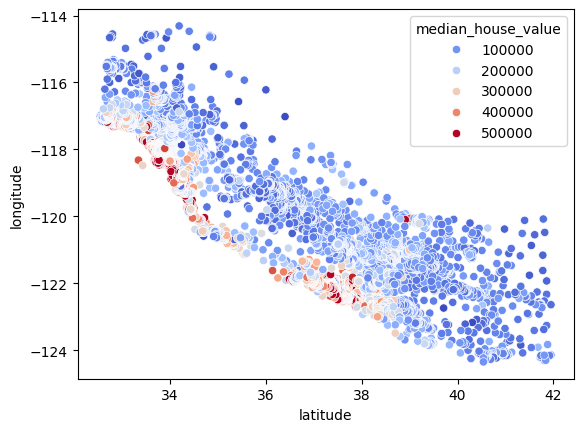

In [ ]:
import seaborn as sns
sns.scatterplot(x = "latitude", y = "longitude", data = datos, hue = "median_house_value", palette = "coolwarm")

In [5]:
datos.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [6]:
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"] ]
modelo = KMeans(n_clusters = 6)
predicciones = modelo.fit_predict(X)

In [15]:
predicciones.shape

(20640,)

In [23]:
X["segmento_economico"] = predicciones

In [24]:
X

,latitude,longitude,median_income,segementi_economico,segemento_economico,segmento_economico
0,37.88,-122.23,8.3252,3,3,3
1,37.86,-122.22,8.3014,3,3,3
2,37.85,-122.24,7.2574,3,3,3
3,37.85,-122.25,5.6431,3,3,3
4,37.85,-122.25,3.8462,0,0,0
...,...,...,...,...,...,...
20635,39.48,-121.09,1.5603,0,0,0
20636,39.49,-121.21,2.5568,0,0,0
20637,39.43,-121.22,1.7000,0,0,0
20638,39.43,-121.32,1.8672,0,0,0


In [25]:
X["segmento_economico"].value_counts()

segmento_economico
0    5486
2    5231
1    4747
3    3021
5    1795
4     360
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

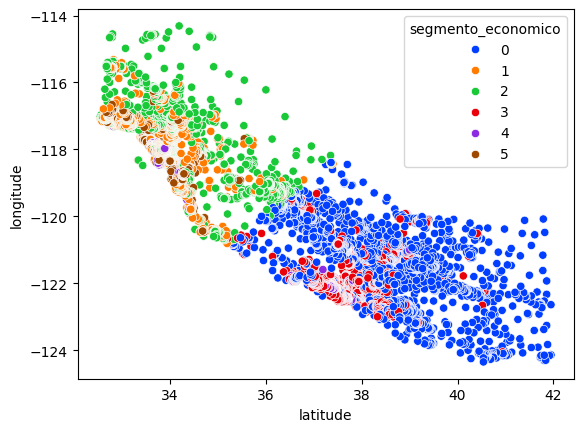

In [27]:
sns.scatterplot(x = "latitude", y = "longitude", data = X, hue = "segmento_economico", palette = "bright")

In [28]:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.736892
1     4.221640
2     2.391014
3     5.393056
4    11.514108
5     6.624535
Name: median_income, dtype: float64